<a href="https://colab.research.google.com/github/Brunolts01/data_science/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify, Netflix  ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png" width="60%"></p>

É extremamente importante acompanhar essa métrica e entender onde estão os gap´s de uma operação. Compreender por que os clientes abondanam o seu serviço/produto é vital para uma empresa que deseja crescer de forma sustentável.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

Vamos importar algumas bibliotecas que usaremos ao decorrer do projeto, importar nosso arquivo e visualizar as primeiras entradas do mesmo nessa primeira parte.

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importar os dados
DATA_PATH = ("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(DATA_PATH)

# Ajustando notebook
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# ver as 10 primeiras entradas
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


####  Descrição das colunas
* customerID - ID do cliente
* gender - Gênero
* SeniorCitizen - Idoso
* Partner - Sócio
* Dependents - Dependentes
* tenure - Mandato
* PhoneService - Serviço Telefônico
* MultipleLines - Linhas múltiplas
* InternetService - Serviço de Internet
* OnlineSecurity - Segurança Online
* OnlineBackup - OnlineBackup
* DeviceProtection - Proteção de dispositivos
* TechSupport - Suporte Técnico
* StreamingTV - StreamingTV
* StreamingMovies - StreamingFilmes
* Contract - Contrato
* PaperlessBilling - PaperlessBilling
* PaymentMethod - Forma de pagamento
* MonthlyCharges - MensalidadeEncargos
* TotalCharges - TotalEncargos
* Churn - Cancelamento


## Análise exploratória

Dado que importamos e vimos as primeiras linhas do dataset, agora iremos responder algumas questões importantes. Como por exemplo, número de variáveis, números de colunas e valores ausentes na base.

In [3]:
# Verificando volume de variáveis e entradas do dataset

print('Total de variáveis do dataset: \t{}'.format(df.shape[1]))
print('Total de entradas do dataset: \t{}'.format(df.shape[0]))

Total de variáveis do dataset: 	21
Total de entradas do dataset: 	7043


In [4]:
# Valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

In [5]:
# Verificando tipo das colunas

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Há um erro na coluna total 'TotalCharges', como se vê, a mesma está classificada como tipo 'object', quando o correto seria float. Iremos ajustar a variável e preencher os valores inválidos com a mediana.

In [6]:
# Ajustando colunas TotalCharges

df.TotalCharges = df.TotalCharges.replace(' ', np.nan).astype(float)
TotalChargesMedian = df.TotalCharges.median()
df['TotalCharges'].fillna(TotalChargesMedian, inplace=True)

In [7]:
# Retirar coluna CustomerID - não será usada no nosso modelo

df = df.drop('customerID', axis=1)

In [8]:
# Verificando tipos novamente

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# Vendo resumo das variáveis

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#### Visualizando os dados

Agora iremos plotar alguns gráficos para entender melhor nossas variáveis e o que precisará ser feito nelas.

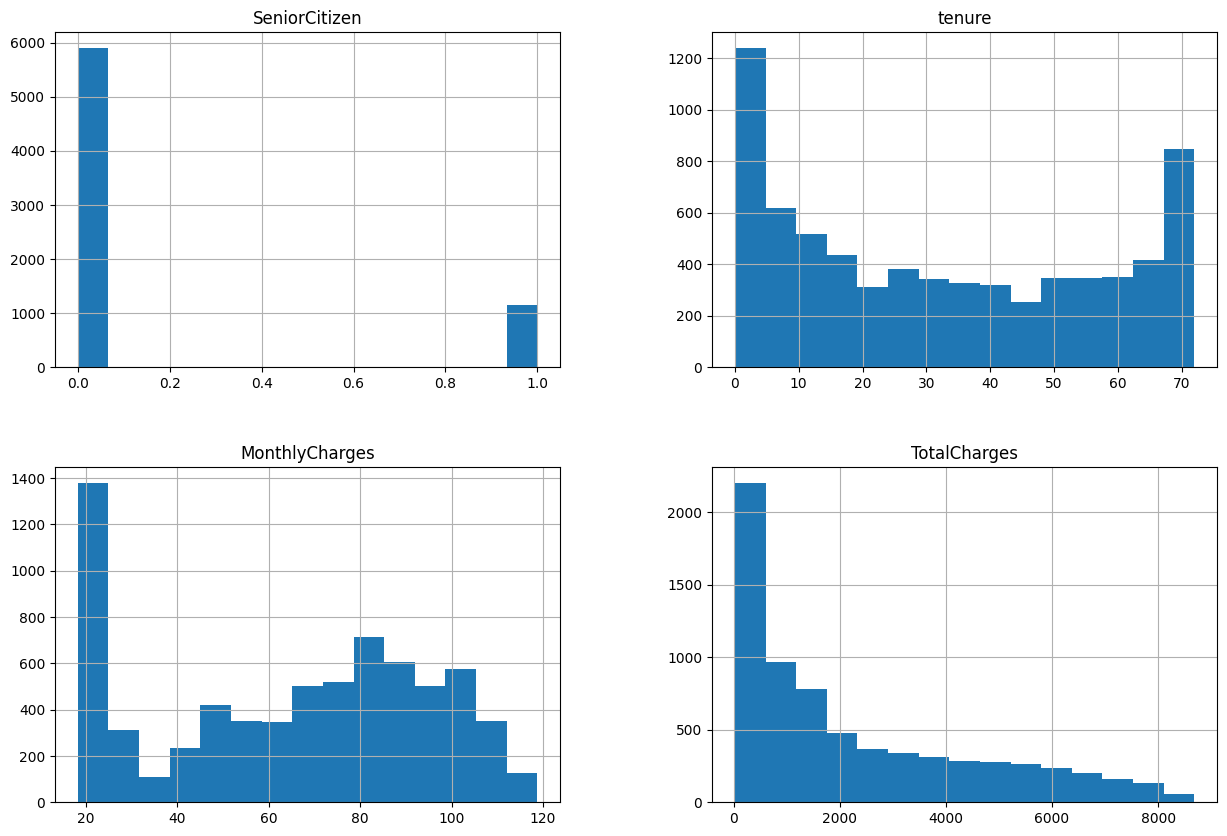

In [10]:
# Histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

##### Verificando a existência de outliers

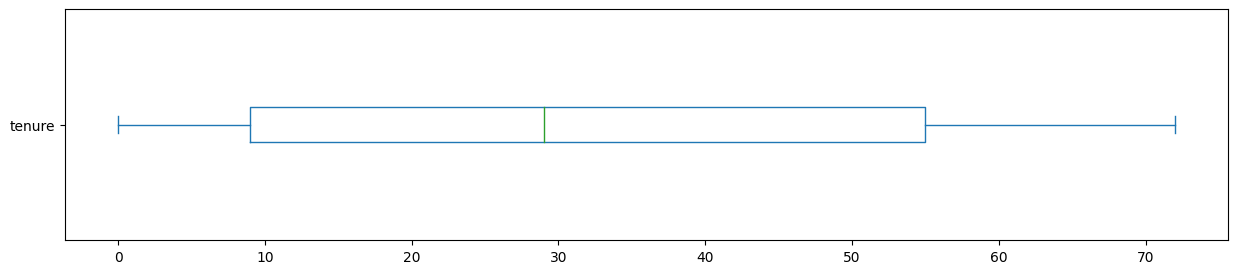

In [11]:
# Tenure
df['tenure'].plot(kind='box', vert=False, figsize=(15,3));

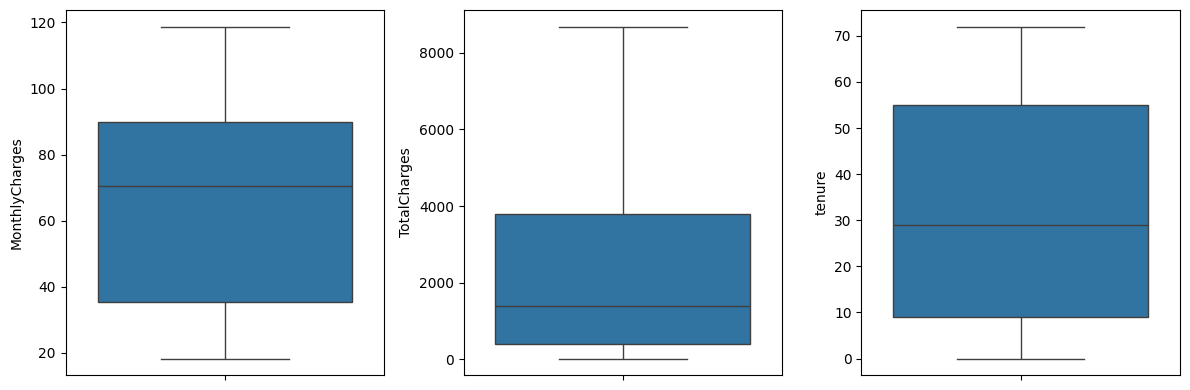

In [12]:
# Monthly Charges
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sns.boxplot(df['MonthlyCharges'], ax=ax[0])
sns.boxplot(df['TotalCharges'], ax=ax[1])
sns.boxplot(df['tenure'], ax=ax[2])
plt.tight_layout()


##### Distribuição das variáveis PhoneService e Senior Citizen, além a variável alvo 'Churn'

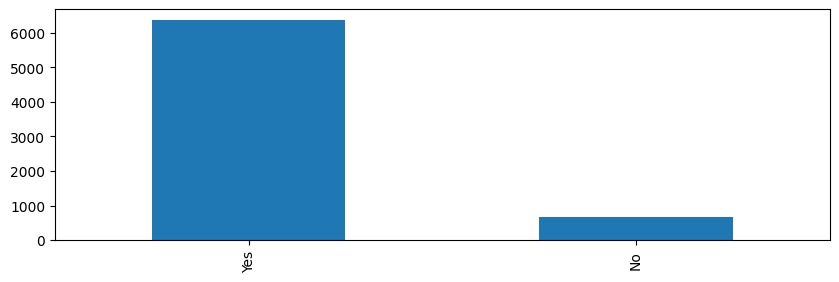

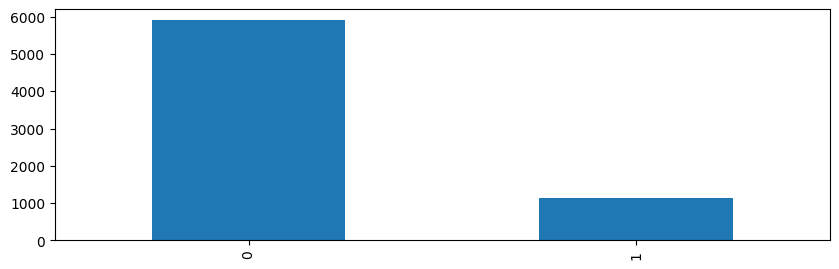

In [13]:
df['PhoneService'].value_counts().plot(kind='bar', figsize=(10,3));
plt.show()
df['SeniorCitizen'].value_counts().plot(kind='bar', figsize=(10,3))
plt.show()

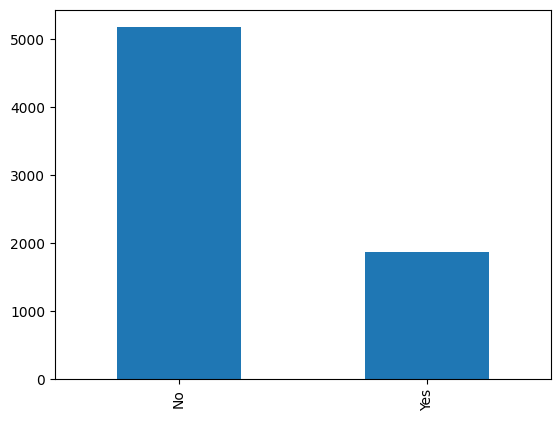

In [14]:
df['Churn'].value_counts().plot(kind='bar');

Avaliando os gráficos podemos ver que não temos outliers. Porém, temos desbalanceamento na variável alvo (churn), essa situação precisará ser tratadada.

### Pré processamento de dados

Nessa parte do projeto, iremos preparar os dados para nosso modelo. As features que contém 2 labels únicos serão processadas com LabelEncoder, as que contém
multiplos valores categóricos, serão processadas com variáveis dummy.

In [15]:
# Importando pacotes necessários
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separando Variáveis
variaveis_binarias = df.nunique()[df.nunique() == 2].keys().tolist()
variaveis_numericas = [col for col in df.select_dtypes(['int', 'float']).columns.tolist() if col not in variaveis_binarias]
variaveis_categoricas = [col for col in df.columns.tolist() if col not in variaveis_binarias + variaveis_numericas]

# Novo dataframe
df_new = df.copy()

# Label encoding (variáveis bináris)
le = LabelEncoder()
for i in variaveis_binarias:
  df_new[i] = le.fit_transform(df_new[i])


# Encodig para colunas categóricas com múltiplas classes
df_new = pd.get_dummies(df_new, columns=variaveis_categoricas)

### Divisão do conjunto de dados entre treino e teste

Como foi dito acima, não existem outliers no dataset, o que é um ponto positivo. Porém, nossa variável alvo (Churn) está desbalanceada, há mais valores
de uma categoria do que outra e isso pode prejudicar nosso modelo. Vamos corrigir isso, separar o dados e fazer o fit do algoritmo. Usaremos dois algoritmos diferentes, o primeiro é a regressão logística, o segundo xgboost, vamos treinar e ver qual dos dois se sai melhor.

In [16]:
# importando pacotes necessários
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


# 1. Escolher e importar um modelo
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()
model2 = XGBClassifier(
    learning_rate=0.05, ## taxa de aprendizado
    n_estimators=100,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.1,
    gamma=1,
    random_state=42
)

# 3. Separar os dados entre feature matrix e target vector
X = df_new.drop('Churn', axis=1)
y = df_new['Churn']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)




In [17]:
print('Volume de dados de treino: ', X_train.shape)
print('Volume de dados de teste: ', X_test.shape)

Volume de dados de treino:  (5282, 40)
Volume de dados de teste:  (1761, 40)


##### Padronização e balanceamento de dados

Agora iremos padronizar e balancear os dados. Junto a isso, iremos criar uma lista 'C' para usarmos a técnica de Gridsearch que permite avaliar os melhores parâmetros para nosso algoritmo.

O C na biblioteca do sklearn é um hiperparâmetro, que seria o inverso da força de regularização. Basicamente, podemos dizer que quanto maior o valor de C estamos dizendo ao algoritmo 'Confie bastante nesse dados de treinamento porque eles representam o mundo real', enquanto um valor baixo falaria o contrário disso.

0    1411
1    1411
Name: Churn, dtype: int64


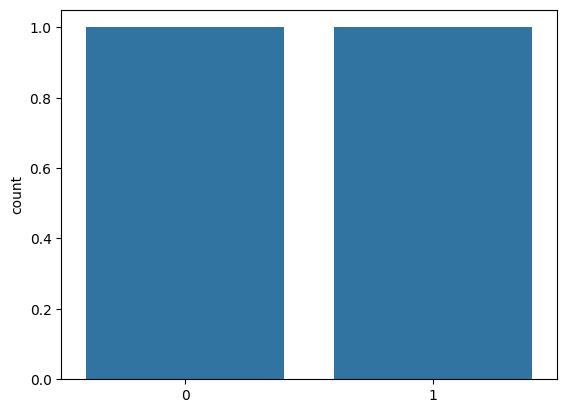

In [18]:
# 3.2 padronizar dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Grid search
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# 5. Balanceamento de dados
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train)


#  Ver o balance das classes
print(pd.Series(y_res).value_counts())

# Visualização gráfico por classe
sns.countplot(pd.Series(y_res).value_counts());

Com os dados devidamente balanceados podemos seguir com o modelo

In [19]:
# 6. Grid search para regressão logística
clf = GridSearchCV(model, parameters)
clf.fit(X_res, y_res)
print(clf.best_params_)
print("Melhor: {} usando {}".format(clf.best_score_, clf.best_params_))

{'C': 0.1}
Melhor: 0.7714366409339108 usando {'C': 0.1}


In [20]:
# Ver todos os parâmetros testados
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.3f (+/-%0.03f) for %r"
  %(mean, std * 2, params))

0.769 (+/-0.032) for {'C': 0.001}
0.771 (+/-0.033) for {'C': 0.01}
0.771 (+/-0.033) for {'C': 0.1}
0.771 (+/-0.033) for {'C': 1}
0.770 (+/-0.031) for {'C': 10}
0.769 (+/-0.032) for {'C': 100}
0.769 (+/-0.032) for {'C': 1000}


Como se vê, o melhor número para o parâmetro 'C' foi o 0.1. Iremos instanciar o modelo novamente usando o mesmo.

In [21]:
# 6.1 Instaciando de novo o modelo com pontuação indicada pelo Grid Search
model = LogisticRegression(C=0.1)

# 6.2 fit do modelo (treinar)
model.fit(X_res, y_res)
model2.fit(X_res, y_res)

# 7. Padronizar dados de teste
X_test = scaler.transform(X_test)

# 8. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

#### Avaliação do modelo

In [22]:
# Classification report

print('Regressão Logistíca -->')
print(classification_report(y_test, y_pred))

print('Xgboost -->')
print(classification_report(y_test, y_pred2))


Regressão Logistíca -->
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1303
           1       0.50      0.81      0.62       458

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.81      0.74      0.75      1761

Xgboost -->
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1303
           1       0.51      0.82      0.63       458

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



#### Relatório

Como se vê, os dois modelos se sairam bem. O xgboost se sobresaiu por um valor mínimo na duas categorias (0, 1). Ainda seria possível otimizar ainda mais os algoritmos, principalmente o xgboost e melhorar ainda mais a performance.

#### Matriz de confusão

Iremos gerar duas matrizes para entender junto com o classification report qual dos dois modelos se saiu melhor.


##### Regressão Logística

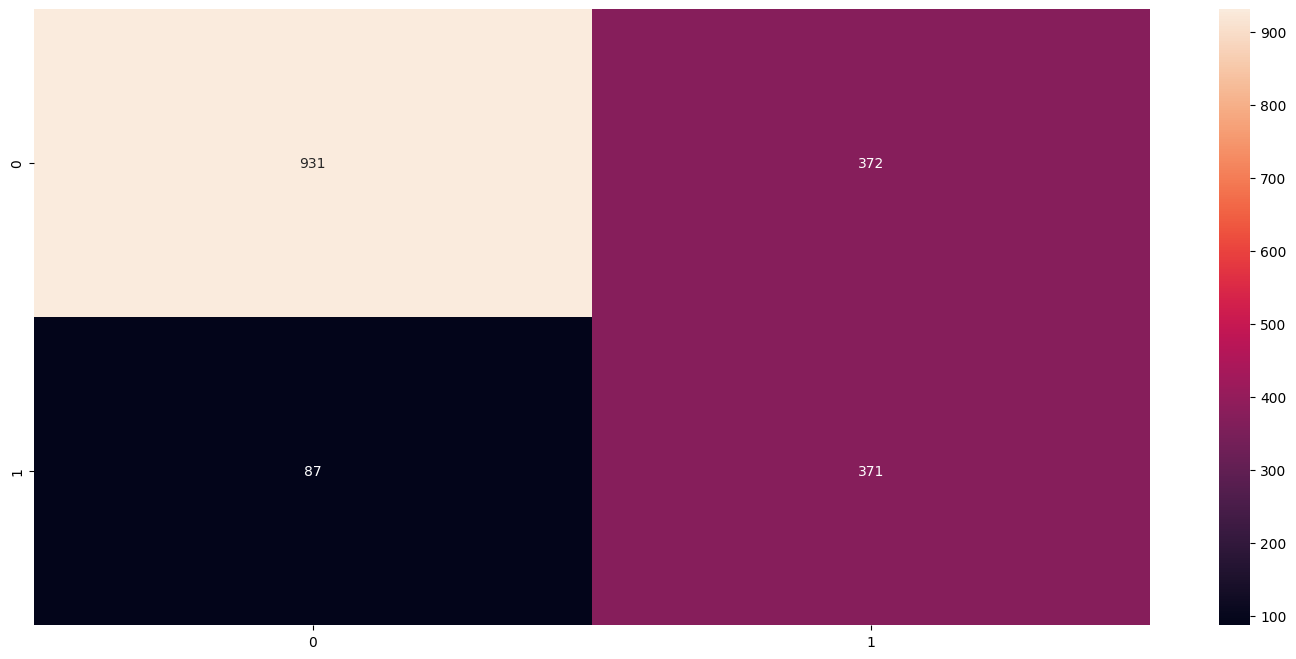

In [26]:
# Matriz de confusão

fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, fmt='.0f');

##### Xgboost

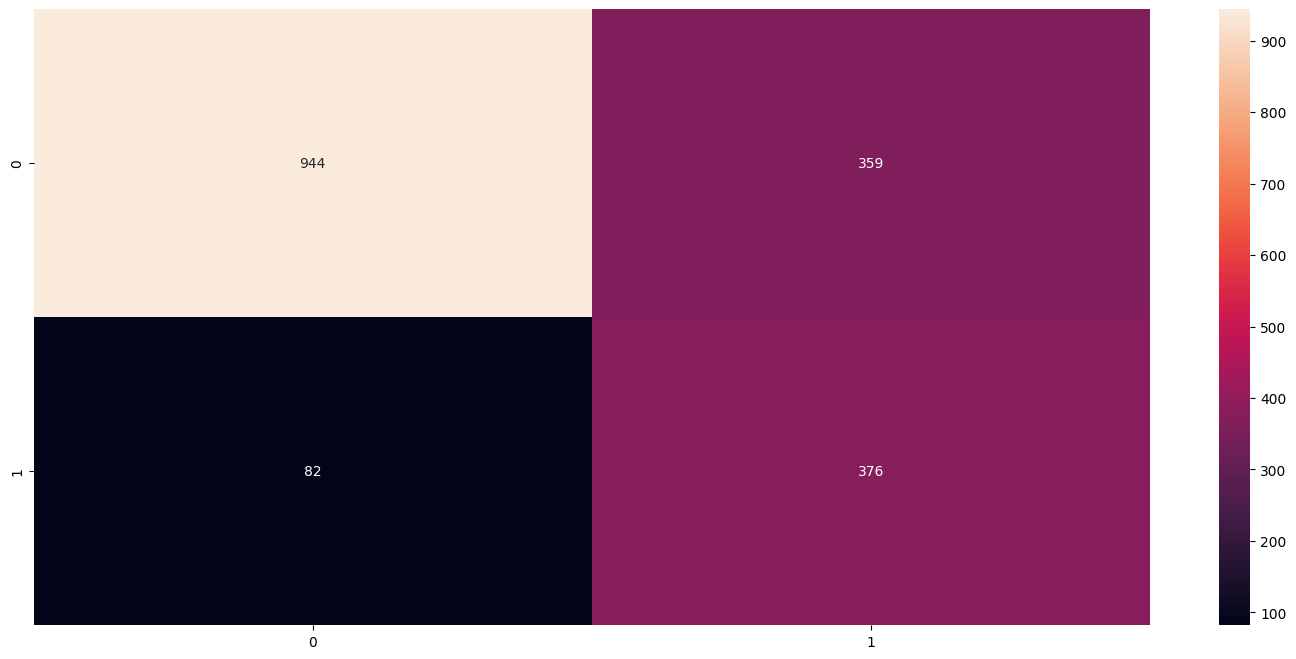

In [27]:
# Matriz de confusão
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, ax=ax, fmt='.0f');